In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_csv('final_vuelo.csv')
df

,MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT,clime,DEST,Condition,DELAY_STATUS
0,0.622243,0.499202,-0.847784,-0.710402,-1.654133,-1.340285,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,-1.001041,-0.875884,CHS,Fair / Windy,0
1,0.622243,0.499202,1.219484,1.357427,-1.621436,-1.099959,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,-0.855057,-0.875884,LAX,Fair / Windy,0
2,0.622243,0.499202,-0.370722,-0.223523,-1.595279,-1.241838,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,0.166829,-0.875884,FLL,Fair / Windy,1
3,0.622243,0.499202,-0.479526,-0.364077,-1.588739,-1.152078,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,-1.293008,-0.875884,MCO,Fair / Windy,0
4,0.622243,0.499202,-0.722242,-0.570972,-1.546233,-1.192615,0.560651,0.128137,0.011385,1.858498,2.478788,-0.615933,-2.322987,-1.383478,-1.147024,-0.875884,ATL,Fair / Windy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28813,-1.381086,0.499202,-1.408541,-1.256875,1.775772,1.494401,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.166328,0.431822,-0.271122,-1.425826,ORH,Cloudy,1
28814,-1.381086,0.499202,-1.257890,-1.215271,1.841166,-2.565078,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.271479,-0.657358,0.166829,-1.425826,BOS,Cloudy,1
28815,-1.381086,0.499202,1.395244,1.297832,1.893481,1.233806,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.271479,-0.657358,0.020845,-1.425826,SEA,Cloudy,1
28816,-1.381086,0.499202,-0.010833,0.371301,1.939257,-1.881742,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.271479,-0.657358,-1.147024,-1.425826,SJU,Cloudy,1


In [3]:
df = df.drop([ 'DEST' ,'Condition'] , axis =1)

In [4]:
## X/y Split
y = df['DELAY_STATUS']
X= df.drop(['DELAY_STATUS'], axis = 1)

In [5]:
y

0        0
1        0
2        1
3        0
4        0
        ..
28813    1
28814    1
28815    1
28816    1
28817    0
Name: DELAY_STATUS, Length: 28818, dtype: int64

In [6]:
X

,MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT,clime
0,0.622243,0.499202,-0.847784,-0.710402,-1.654133,-1.340285,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,-1.001041,-0.875884
1,0.622243,0.499202,1.219484,1.357427,-1.621436,-1.099959,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,-0.855057,-0.875884
2,0.622243,0.499202,-0.370722,-0.223523,-1.595279,-1.241838,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,0.166829,-0.875884
3,0.622243,0.499202,-0.479526,-0.364077,-1.588739,-1.152078,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,-1.293008,-0.875884
4,0.622243,0.499202,-0.722242,-0.570972,-1.546233,-1.192615,0.560651,0.128137,0.011385,1.858498,2.478788,-0.615933,-2.322987,-1.383478,-1.147024,-0.875884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28813,-1.381086,0.499202,-1.408541,-1.256875,1.775772,1.494401,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.166328,0.431822,-0.271122,-1.425826
28814,-1.381086,0.499202,-1.257890,-1.215271,1.841166,-2.565078,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.271479,-0.657358,0.166829,-1.425826
28815,-1.381086,0.499202,1.395244,1.297832,1.893481,1.233806,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.271479,-0.657358,0.020845,-1.425826
28816,-1.381086,0.499202,-0.010833,0.371301,1.939257,-1.881742,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.271479,-0.657358,-1.147024,-1.425826


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((23054, 16), (5764, 16), (23054,), (5764,))

In [9]:
transformer = StandardScaler()
transformer.fit(X_train)
X_train_scaled_np = transformer.transform(X_train)
X_train_scaled_np

array([[ 0.62222346, -1.01351814,  1.50433724, ..., -1.13854984,
         0.88870673,  0.36102586],
       [ 0.62222346,  0.49728949, -0.78984978, ...,  1.40896411,
        -1.00566794,  0.2236358 ],
       [ 0.62222346, -0.50991559,  1.32850538, ..., -0.16806834,
         0.88870673, -1.42504501],
       ...,
       [ 0.62222346,  1.50449457, -0.84846039, ...,  1.40896411,
        -1.00566794, -1.01287481],
       [ 0.82260816,  1.00089203,  1.56294785, ...,  1.65158449,
        -1.15138907,  1.0479762 ],
       [-1.3816236 , -0.50991559, -1.04941108, ..., -0.04675815,
         0.30582222,  1.0479762 ]])

In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
X_train_scaled

,MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT,clime
3617,0.622223,-1.013518,1.504337,1.482970,-1.093058,-0.547418,0.559426,0.942100,1.206787,1.380090,2.301613,-1.126349,2.191739,-1.138550,0.888707,0.361026
7125,0.622223,0.497289,-0.789850,-0.711265,0.072848,0.225022,1.057269,1.348747,1.334817,-0.058902,-0.467105,-1.363360,-0.434202,1.408964,-1.005668,0.223636
8821,0.622223,-0.509916,1.328505,1.358067,0.693358,0.910671,1.430651,1.592736,1.334817,0.740538,-0.467105,-1.668089,-0.329164,-0.168068,0.888707,-1.425045
22510,-1.381624,1.504495,-1.074530,-1.100601,-0.648903,-0.686283,2.675258,1.430077,0.011833,1.220202,-0.467105,-0.279879,-1.274503,-0.895929,-0.568505,0.773196
26448,-1.381624,0.497289,-1.158259,-1.216502,1.098323,0.991676,-0.187339,0.047477,0.523956,-0.698454,-0.467105,0.702026,0.931288,0.317172,-0.131341,0.773196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,-1.381624,-0.006313,1.135928,0.995737,-0.577055,-0.044030,-1.307486,-1.904429,-0.884383,-0.378678,-0.467105,2.191812,-0.854352,-0.895929,-0.714226,1.047976
5390,0.622223,1.504495,-0.379575,-0.270167,0.128367,0.404390,-0.062878,0.128806,0.523956,1.539979,2.049912,0.363438,-0.224126,0.802413,-0.277062,-1.287655
860,0.622223,1.504495,-0.848460,-0.883428,1.274678,1.272301,0.932808,-0.196511,-0.585644,0.260874,-0.467105,0.363438,-0.644277,1.408964,-1.005668,-1.012875
15795,0.822608,1.000892,1.562948,1.482970,1.235488,1.512422,-1.058564,-0.115182,1.164110,-1.497895,-0.467105,1.311484,0.406099,1.651584,-1.151389,1.047976


In [11]:
#We apply the same transformer to X_test
X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np, columns= X_train.columns, index=X_test.index)
X_test_scaled

,MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT,clime
7821,0.622223,1.504495,-0.513543,-0.594239,0.552927,0.514326,0.061583,0.535453,1.036079,1.380090,1.966011,-2.345265,0.090986,0.681103,-1.005668,0.361026
23731,-1.381624,-0.509916,0.934977,0.812322,1.581668,-2.624616,0.186043,1.023430,-2.036660,-0.698454,-0.467105,0.024850,0.090986,-0.046758,0.597264,1.047976
21388,-1.381624,-0.509916,1.336878,1.325435,0.863182,1.130542,-1.183025,-1.497782,-0.585644,1.859755,2.469414,0.363438,0.721212,1.045034,0.597264,-0.875485
10152,0.822608,-1.013518,-1.041038,-1.088223,-1.161641,-0.966908,-1.058564,-0.359170,0.737340,0.580650,-0.467105,-1.905101,0.826250,0.438483,0.742986,0.773196
11680,0.822608,1.504495,1.479218,1.463841,-0.818727,-0.324654,-0.934104,-0.603158,0.267894,-0.538566,-0.467105,1.548495,0.090986,-1.138550,0.888707,0.773196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0.622223,-1.517121,-0.848460,-0.711265,-1.680910,-1.334323,-0.436260,0.210136,1.078756,-1.497895,-0.467105,0.803602,-1.904729,-0.895929,-1.588552,-1.012875
3899,0.622223,-0.509916,0.223277,0.138298,-1.419642,-0.917726,-2.303172,-1.823099,-0.201552,1.220202,-0.467105,0.566590,-1.694653,-1.381170,0.305822,-1.012875
17349,0.822608,-0.006313,0.742399,0.627781,1.170171,1.382236,0.434965,0.779441,1.036079,-0.378678,-0.467105,0.939037,1.036325,0.195862,-0.277062,-1.425045
15084,0.822608,-0.006313,1.336878,1.358067,0.601915,0.899099,-2.054250,-1.741770,-0.286906,0.580650,-0.467105,1.006755,-0.434202,0.681103,0.160101,-1.012875


In [12]:
y_train

3617     0
7125     0
8821     1
22510    1
26448    0
        ..
21575    0
5390     0
860      0
15795    1
23654    0
Name: DELAY_STATUS, Length: 23054, dtype: int64

In [13]:
y_test

7821     1
23731    1
21388    0
10152    0
11680    1
        ..
907      0
3899     0
17349    0
15084    0
16912    1
Name: DELAY_STATUS, Length: 5764, dtype: int64

In [14]:
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [15]:
lr.n_iter_

array([24], dtype=int32)

In [16]:
predictions_train = lr.predict(X_train_scaled)
predictions_train

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
predictions_test = lr.predict(X_test_scaled)
predictions_test

array([0, 0, 0, ..., 0, 1, 0])

In [18]:
print("The accuracy of the model in the TRAIN set is: {:.2f}".format(lr.score(X_train_scaled, y_train)))

The accuracy of the model in the TRAIN set is: 0.69


In [19]:
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_scaled, y_test)))

The accuracy of the model in the TEST set is: 0.68


### Imbalance and metrcis

In [20]:
count_classes = df['DELAY_STATUS'].value_counts()
count_classes

0    19549
1     9269
Name: DELAY_STATUS, dtype: int64

<Axes: xlabel='DELAY_STATUS', ylabel='count'>

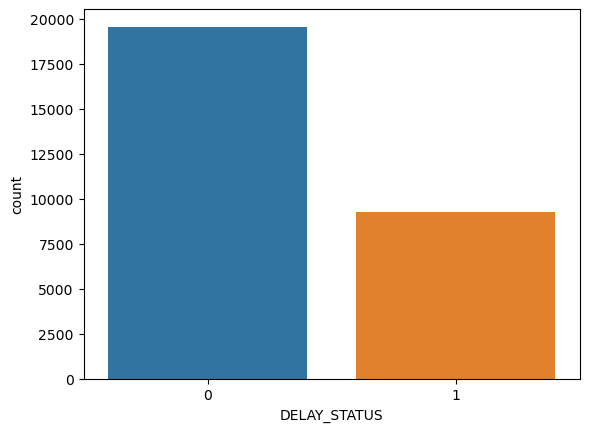

In [21]:
sns.countplot(x='DELAY_STATUS', data=df)

#### La  columna "DELAY_STATUS" se utiliza para registrar los retrasos o adelantos en la salida de vuelos con respecto a los horarios programados. 
### Los valores 1 representan retrasos, mientras que los valores 0 representan adelantos en la salida.

In [22]:
count_classes[0], count_classes[1]

(19549, 9269)

In [23]:
count_classes[1]/(count_classes[0]+count_classes[1])*100

32.16392532445

In [24]:
### nuestro modelo tiene 32%


In [25]:
#If accuracy is not a good metric to decide, let's check the other metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.68
The precision in the TEST set is: 0.57
The recall in the TEST set is: 0.11
The F1 in the TEST set is: 0.19
The Kappa in the TEST set is: 0.09


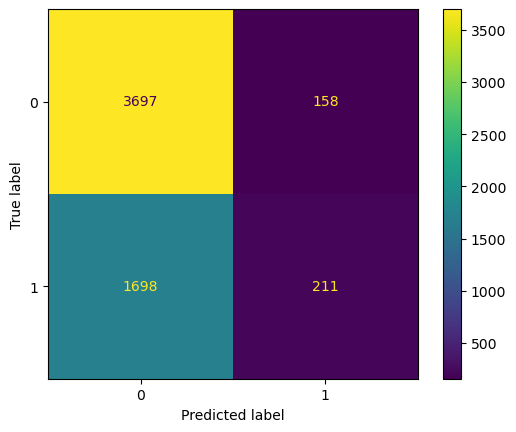

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()


In [27]:
1698 + 211

1909

In [28]:
1698/1909

0.8894709271870089

In [29]:
#fallamos el 88%  que si son DELAY   falsos negativos.

## Oversampling the minority class

In [29]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [30]:
X_train_scaled

,MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT,clime
3617,0.622223,-1.013518,1.504337,1.482970,-1.093058,-0.547418,0.559426,0.942100,1.206787,1.380090,2.301613,-1.126349,2.191739,-1.138550,0.888707,0.361026
7125,0.622223,0.497289,-0.789850,-0.711265,0.072848,0.225022,1.057269,1.348747,1.334817,-0.058902,-0.467105,-1.363360,-0.434202,1.408964,-1.005668,0.223636
8821,0.622223,-0.509916,1.328505,1.358067,0.693358,0.910671,1.430651,1.592736,1.334817,0.740538,-0.467105,-1.668089,-0.329164,-0.168068,0.888707,-1.425045
22510,-1.381624,1.504495,-1.074530,-1.100601,-0.648903,-0.686283,2.675258,1.430077,0.011833,1.220202,-0.467105,-0.279879,-1.274503,-0.895929,-0.568505,0.773196
26448,-1.381624,0.497289,-1.158259,-1.216502,1.098323,0.991676,-0.187339,0.047477,0.523956,-0.698454,-0.467105,0.702026,0.931288,0.317172,-0.131341,0.773196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,-1.381624,-0.006313,1.135928,0.995737,-0.577055,-0.044030,-1.307486,-1.904429,-0.884383,-0.378678,-0.467105,2.191812,-0.854352,-0.895929,-0.714226,1.047976
5390,0.622223,1.504495,-0.379575,-0.270167,0.128367,0.404390,-0.062878,0.128806,0.523956,1.539979,2.049912,0.363438,-0.224126,0.802413,-0.277062,-1.287655
860,0.622223,1.504495,-0.848460,-0.883428,1.274678,1.272301,0.932808,-0.196511,-0.585644,0.260874,-0.467105,0.363438,-0.644277,1.408964,-1.005668,-1.012875
15795,0.822608,1.000892,1.562948,1.482970,1.235488,1.512422,-1.058564,-0.115182,1.164110,-1.497895,-0.467105,1.311484,0.406099,1.651584,-1.151389,1.047976


In [31]:
print(X_train.shape)
print(y_train[y_train== 0].shape)

(23054, 16)
(15694,)


In [32]:
y_train.value_counts()

0    15694
1     7360
Name: DELAY_STATUS, dtype: int64

In [33]:
ros = RandomOverSampler(random_state=42)
ros

RandomOverSampler(random_state=42)

In [34]:
X_train_over, y_train_over = ros.fit_resample(X_train_scaled,y_train)

In [35]:
y_train_over.value_counts()

0    15694
1    15694
Name: DELAY_STATUS, dtype: int64

In [36]:
print('Resampled dataset shape %s' % Counter(y_train_over))

Resampled dataset shape Counter({0: 15694, 1: 15694})


In [37]:
lr = LogisticRegression()
lr.fit(X_train_over, y_train_over)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.58
The precision in the TEST set is: 0.41
The recall in the TEST set is: 0.57
The F1 in the TEST set is: 0.47
The Kappa in the TEST set is: 0.15


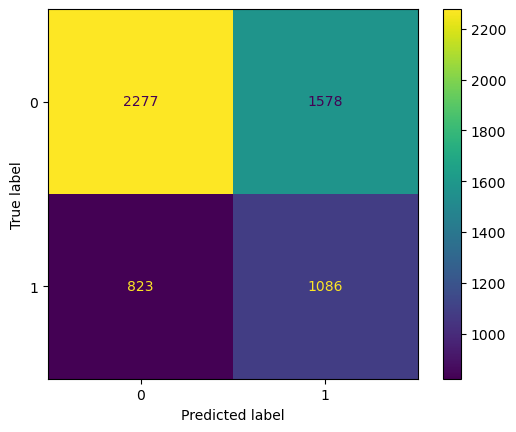

In [38]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

# SMOTE

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
sm = SMOTE(random_state=100, k_neighbors=5)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train_scaled, y_train)

In [41]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(23054, 16)
(31388, 16)


In [42]:
y_train_SMOTE.value_counts()

0    15694
1    15694
Name: DELAY_STATUS, dtype: int64

In [43]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.58
The precision in the TEST set is: 0.41
The recall in the TEST set is: 0.57
The F1 in the TEST set is: 0.48
The Kappa in the TEST set is: 0.14


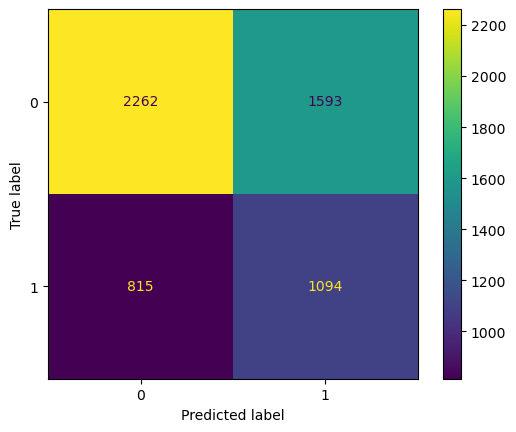

In [44]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

### Appropriate outcome structure
Since logistic regression assumes that P(Y=1) is the probability of the event occurring, it is necessary that the dependent variable is coded accordingly. 

In binary logistic regression, there are only two possible values for the target variable, and the desired outcome should have the value of 1.

If there are more than two possible values for the dependant variable, you need to use multinomial logistic regression.

In [45]:
df.DELAY_STATUS.value_counts()

0    19549
1     9269
Name: DELAY_STATUS, dtype: int64

### Absence of multicolinearity

In [46]:
y = df['DELAY_STATUS']
X= df.drop(['DELAY_STATUS'], axis = 1)

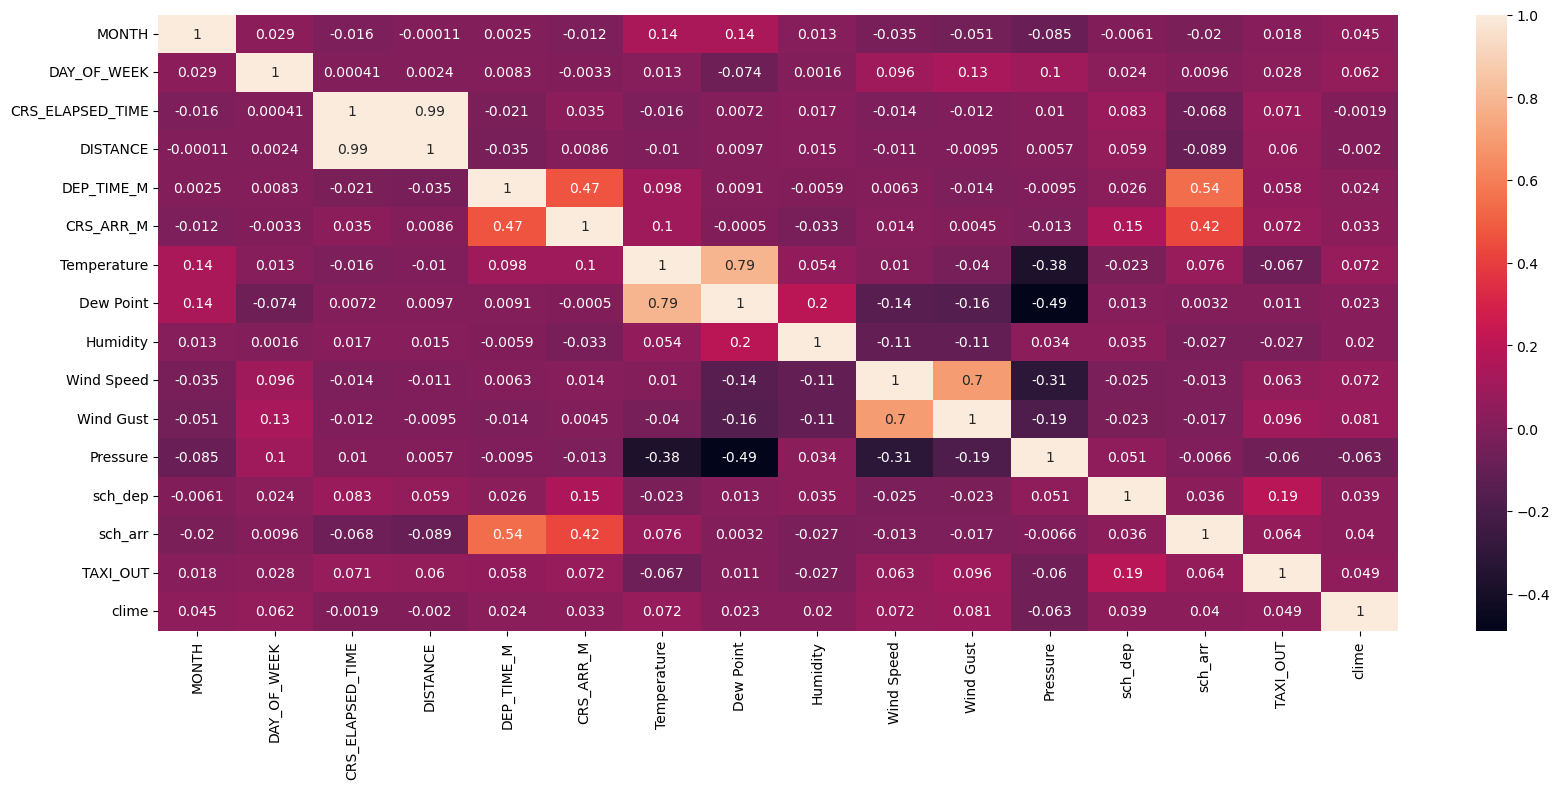

In [47]:
correlation_matrix = X.corr()
plt.figure(figsize=(20,8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

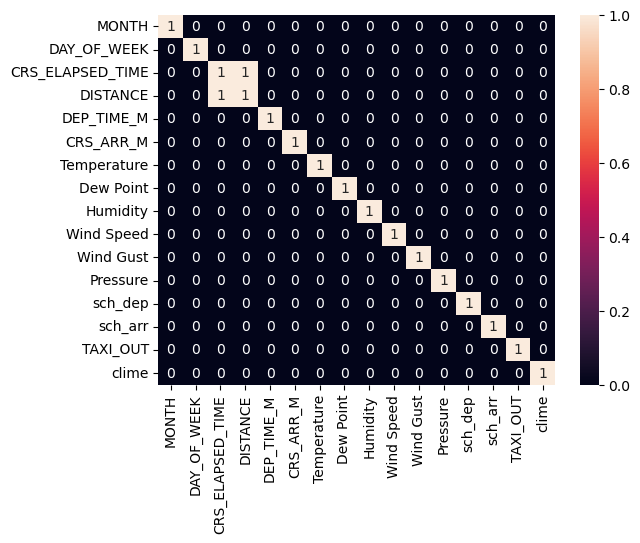

In [48]:
sns.heatmap(correlation_matrix>0.79, annot=True)
plt.show()

## VIF

In [57]:
considered_features=['MONTH','DAY_OF_WEEK','CRS_ELAPSED_TIME',	'DISTANCE','DEP_TIME_M','CRS_ARR_M',	'Temperature',	'Dew Point','Humidity',	'Wind Speed'	,'Wind Gust',	'Pressure',	'sch_dep',	'sch_arr','TAXI_OUT','clime']

In [58]:
 X['intercept'] = 1

In [97]:
   X = df[considered_features]
    # the calculation of variance inflation requires a constant

In [54]:
X

,MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT,clime,intercept
0,0.622243,0.499202,-0.847784,-0.710402,-1.654133,-1.340285,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,-1.001041,-0.875884,1
1,0.622243,0.499202,1.219484,1.357427,-1.621436,-1.099959,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,-0.855057,-0.875884,1
2,0.622243,0.499202,-0.370722,-0.223523,-1.595279,-1.241838,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,0.166829,-0.875884,1
3,0.622243,0.499202,-0.479526,-0.364077,-1.588739,-1.152078,0.809334,0.290565,0.011385,2.018279,2.731173,-0.784764,-2.322987,-1.383478,-1.293008,-0.875884,1
4,0.622243,0.499202,-0.722242,-0.570972,-1.546233,-1.192615,0.560651,0.128137,0.011385,1.858498,2.478788,-0.615933,-2.322987,-1.383478,-1.147024,-0.875884,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28813,-1.381086,0.499202,-1.408541,-1.256875,1.775772,1.494401,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.166328,0.431822,-0.271122,-1.425826,1
28814,-1.381086,0.499202,-1.257890,-1.215271,1.841166,-2.565078,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.271479,-0.657358,0.166829,-1.425826,1
28815,-1.381086,0.499202,1.395244,1.297832,1.893481,1.233806,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.271479,-0.657358,0.020845,-1.425826,1
28816,-1.381086,0.499202,-0.010833,0.371301,1.939257,-1.881742,-0.309741,0.615422,1.630537,-1.017564,-0.465711,0.295758,-1.271479,-0.657358,-1.147024,-1.425826,1


In [98]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif

,Variable
0,MONTH
1,DAY_OF_WEEK
2,DISTANCE
3,DEP_TIME_M
4,CRS_ARR_M
5,Temperature
6,Dew Point
7,Humidity
8,Wind Speed
9,Wind Gust


In [103]:
def calcular_vif(df,considered_features):
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable'] != 'intercept']
    return vif 
        

In [100]:
# compute vif 
calcular_vif(df,considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
6,Dew Point,4.016226
5,Temperature,3.117314
8,Wind Speed,2.269156
9,Wind Gust,2.004202
10,Pressure,1.729505
3,DEP_TIME_M,1.589873
12,sch_arr,1.518720
4,CRS_ARR_M,1.410597
7,Humidity,1.102437
13,TAXI_OUT,1.087777


In [89]:
considered_features=['MONTH','DAY_OF_WEEK','CRS_ELAPSED_TIME',	'DISTANCE','DEP_TIME_M','CRS_ARR_M',	'Temperature',	'Dew Point','Humidity',	'Wind Speed'	,'Wind Gust',	'Pressure',	'sch_dep',	'sch_arr','TAXI_OUT','clime']

VIF: Variance Inflation Factor 

The VIF directly measures the degree of multicollinearity in a set of independent variables.

Mathematically, it is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.

A VIF of 1 indicates that the feature has no correlation with any of the other features.

Generally, a VIF above 5 indicates a high multicollinearity. 

In [95]:
## voy a quitar de mis features CRS_ELAPSED_TIME	

considered_features=['MONTH','DAY_OF_WEEK','DISTANCE','DEP_TIME_M','CRS_ARR_M',	'Temperature',	'Dew Point','Humidity',	'Wind Speed'	,'Wind Gust',	'Pressure',	'sch_dep',	'sch_arr','TAXI_OUT','clime']

In [94]:
calcular_vif(df,considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
2,CRS_ELAPSED_TIME,106.327402
3,DISTANCE,105.990928
7,Dew Point,4.030018
6,Temperature,3.138302
9,Wind Speed,2.269256
10,Wind Gust,2.004480
11,Pressure,1.730626
4,DEP_TIME_M,1.591180
13,sch_arr,1.537976
5,CRS_ARR_M,1.456225


In [101]:
#quitare dew point 
considered_features=['MONTH','DAY_OF_WEEK','DISTANCE','DEP_TIME_M','CRS_ARR_M',	'Temperature','Humidity',	'Wind Speed'	,'Wind Gust',	'Pressure',	'sch_dep',	'sch_arr','TAXI_OUT','clime']

In [102]:
   X = df[considered_features]

In [104]:
calcular_vif(df,considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
7,Wind Speed,2.111601
8,Wind Gust,1.998403
3,DEP_TIME_M,1.586421
11,sch_arr,1.517934
4,CRS_ARR_M,1.398638
9,Pressure,1.361375
5,Temperature,1.245194
12,TAXI_OUT,1.073134
10,sch_dep,1.072918
1,DAY_OF_WEEK,1.048635


In [ ]:
## 140 observaciones 